# UAP Reports versus Military Base Presence

Names: Talin Guliani, Ryan Limpasurat, Shazaib Lalani

Class: Civil Engineering 93

Date: 11/3/2023

In [1]:
#Python Packages
import numpy as np #Used to for statistical and algebraic calculations
import pandas as pd #Used for Data Processing
from scipy.stats import *   #Common Dist
import matplotlib.pyplot as plt #Used for graphing

## Data Processing

Below is where we perform data processing, in essence turning the imported data into more manageable forms. The main processing completed was determining the counts for both UFO sightings and military bases for each state since the data provided raw data for each sighting/base. Further data cleaning was performed to rename column names, omit unwanted years, and standardize the UFO sightings per square mile, to account for the increased size of the state. We standardized to the state area instead of the state population because the population is variable and dependent on the year, while the square milage and number of military bases are roughly stagnant in the 21st century.

In [2]:
#Turn csv files into Dataframes
ufo_df = pd.read_csv("scrubbed.csv", low_memory=False)
mil_df = pd.read_csv("military-bases.csv", low_memory=False)
sizes_df = pd.read_csv("state-areas.csv")

#Used to modify ufo dataframe to have full state names
state_mapping = {
    'al': 'Alabama', 'ak': 'Alaska', 'az': 'Arizona', 'ar': 'Arkansas', 'ca': 'California',
    'co': 'Colorado', 'ct': 'Connecticut', 'de': 'Delaware', 'fl': 'Florida', 'ga': 'Georgia',
    'hi': 'Hawaii', 'id': 'Idaho', 'il': 'Illinois', 'in': 'Indiana', 'ia': 'Iowa', 'ks': 'Kansas',
    'ky': 'Kentucky', 'la': 'Louisiana', 'me': 'Maine', 'md': 'Maryland', 'ma': 'Massachusetts',
    'mi': 'Michigan', 'mn': 'Minnesota', 'ms': 'Mississippi', 'mo': 'Missouri', 'mt': 'Montana',
    'ne': 'Nebraska', 'nv': 'Nevada', 'nh': 'New Hampshire', 'nj': 'New Jersey', 'nm': 'New Mexico',
    'ny': 'New York', 'nc': 'North Carolina', 'nd': 'North Dakota', 'oh': 'Ohio', 'ok': 'Oklahoma',
    'or': 'Oregon', 'pa': 'Pennsylvania', 'ri': 'Rhode Island', 'sc': 'South Carolina', 'sd': 'South Dakota',
    'tn': 'Tennessee', 'tx': 'Texas', 'ut': 'Utah', 'vt': 'Vermont', 'va': 'Virginia',
    'wa': 'Washington', 'wv': 'West Virginia', 'wi': 'Wisconsin', 'wy': 'Wyoming'
}

#UFO data processing
ufo_df['datetime'] = ufo_df['datetime'].str.replace('24:00', '00:00') #Processing to acquire a year variable
ufo_df['datetime'] = pd.to_datetime(ufo_df['datetime'], format='%m/%d/%Y %H:%M')
ufo_df['year'] = ufo_df['datetime'].dt.year
ufo_df = ufo_df[ufo_df['year'] >=2000] #Change to only "modern" age, to align with stagnant military base number
ufo_df = ufo_df[ufo_df['state']!='pr'] #Removed Puerto Rico
ufo_df = ufo_df[ufo_df['state']!='dc'] #Removed DC
ufo_df = ufo_df[ufo_df['country']=='us'] #Remove all non-US areas
ufo_df['state'] = ufo_df['state'].map(state_mapping) #Rename state variables

#Military Base data processing
mil_df = mil_df[mil_df['State Terr'] != "Guam"] #Remove Guam
mil_df = mil_df[mil_df['State Terr'] != "District of Columbia"] #Remove DC
mil_df = mil_df[mil_df['State Terr'] != "Puerto Rico"] #Remove Puerto Rico

#Sizes data processing
sizes_df = sizes_df[sizes_df['state'] !="District of Columbia"] #Remove DC
sizes_df = sizes_df[sizes_df['state'] !="Puerto Rico"] #Remove Puerto Rico

#Provides Counts for each State
ufoPerState = ufo_df['state'].value_counts()
milPerState = mil_df['State Terr'].value_counts()

#Conversion to Dataframe
ufoPerState_df = ufoPerState.rename('UFOCount').reset_index()
milPerState_df = milPerState.rename('MilitaryBaseCount').reset_index()

data = pd.merge(ufoPerState_df,milPerState_df,on="index",how="outer") #First Merge

data = data.rename(columns={'index': 'State'}) #Renaming State Column
sizes_df = sizes_df.rename(columns={'state': 'State'})

data = pd.merge(data,sizes_df,on="State",how="outer") #Second Merge

data['UFOCountPerSqMi'] = data['UFOCount']/data['area (sq. mi)'] #Creates a per area variable for proper comparisons

### Variable Creation

In [3]:
ufo = data['UFOCountPerSqMi']
mil = data['MilitaryBaseCount']

## Introduction

UFO sightings are largely considered to be a subject only for those who are a fan of crazy conspiracy theories, but is there a pattern to these UFO sightings? Looking at some declassified military planes in the modern age, it would not be surprising that people a decade or so ago would think they are alien technology. As such, in this report we will be comparing the amount of military bases to the amount of UFO sightings. In particular, we will see how many military bases there are in every state and look at the effect that has on how many UFO sightings there are in that same state. For this purpose our 2 data sets will be looking at the amount of UFO sightings from 2000-2013 and the amount of military bases active in that same timeframe.

We obtained our UFO data from Kaggle (https://www.kaggle.com/code/hakeemtfrank/ufo-sightings-data-exploration), which includes data such as the city, state, country, described shape, and duration. We obtained our military base data from Opendatasoft (https://public.opendatasoft.com/explore/dataset/military-bases/table/?flg=en-us ), which includes information such as the state, which branch of the armed forces, site name, and activity status. Our hypothesis is that the more military bases that we see in every state, the more UFO sightings there should be. Below we have a basic example of what what variables are of particular use to us.

In [4]:
data.head()

,State,UFOCount,MilitaryBaseCount,area (sq. mi),UFOCountPerSqMi
0,California,7285,73,163707,0.044500
1,Florida,3296,41,65758,0.050123
2,Washington,3102,20,71303,0.043504
3,Texas,2755,42,268601,0.010257
4,New York,2319,17,54475,0.042570


## Summary Stats

### Central Tendency:

Below, for the UFO sightings and military bases per state we calculated the mean and median. We see that the mean for the UFO sightings per state is significantly higher than the median which implies that the data is top heavy, something that is proven when looking at the data and seeing that California has 7285 UFO sightings while the next state, Florida, has 3296 UFO sightings. As such, the median is a better central tendency output as it is less affected by outliers such as California.

We also see that for the amount of military bases per state, there are some similarities. We see these in that the mean is higher than the median, again implying a right leaning bias given that certain states such as California, Texas, and Florida are outliers in that they each have a large amount of military bases. As such, median is once again a better central tendency output as it is less affected by outliers such as Texas and Florida.

In [5]:
#Central Tendencies for UFOs
mean_ufo_per_state=np.mean(data['UFOCount'])
print('The mean amount of UFOs per state is '+str(round(mean_ufo_per_state,3))+' UFOs')
median_ufo_per_state=np.median(data['UFOCount'])
print('The median amount of UFOs per state is '+str(round(median_ufo_per_state,3))+' UFOs')

#Central Tendencies for military bases
mean_mil_per_state=np.mean(data['MilitaryBaseCount'])
print('The mean amount of military bases per state is '+str(round(mean_mil_per_state,3))+' military bases')
median_mil_per_state=np.median(data['MilitaryBaseCount'])
print('The median amount of military bases per state is '+str(round(median_mil_per_state,3))+' military bases')

The mean amount of UFOs per state is 1055.98 UFOs
The median amount of UFOs per state is 685.5 UFOs
The mean amount of military bases per state is 14.78 military bases
The median amount of military bases per state is 11.0 military bases


### Variability

For the UFO sightings and military bases per state variability, we calculated the standard deviation, variance, and interquartile range (IQR). For the UFO sightings per state, the standard deviation is significantly higher than the IQR, this being because there are right-leaning outliers in our data and since IQR is more resistant to outliers than standard deviation, IQR is lower. This is because IQR is calculated using the median of the lower half and upper half of the data while standard deviation is calculated using median, which, referring to the logic above for central tendency, makes IQR more reliable.

We see a similar case for the variability of the military bases in that the IQR is significantly lower than the standard deviation. This is once again because the amount of military bases is right-leaning in that there are some states with a significantly higher amount of military bases than others. As such, using the same logic as above, IQR is a better variability value. 

In [6]:
#Variability for UFOs
var_ufo_per_state=np.var(data['UFOCount'],ddof=1)
print('The variance of UFOs per state is '+str(round(var_ufo_per_state,3))+' UFOs^2')
stdev_ufo_per_state=np.std(data['UFOCount'],ddof=1)
print('The standard deviation of UFOs per state is '+str(round(stdev_ufo_per_state,3))+' UFOs')
q3_ufo_per_state, q1_ufo_per_state=np.percentile(data['UFOCount'], [75 ,25])
IQR_ufo_per_state=q3_ufo_per_state-q1_ufo_per_state
print('The interquartile range of UFOs per state is '+str(round(IQR_ufo_per_state,3))+' UFOs')

#Variability for military bases
var_mil_per_state=np.var(data['MilitaryBaseCount'],ddof=1)
print('The variance of military bases per state is '+str(round(var_mil_per_state,3))+' military bases^2')
stdev_mil_per_state=np.std(data['MilitaryBaseCount'],ddof=1)
print('The standard deviation of military bases per state is '+str(round(stdev_mil_per_state,3))+' military bases')
q3_mil_per_state, q1_mil_per_state=np.percentile(data['MilitaryBaseCount'], [75 ,25])
IQR_mil_per_state=q3_mil_per_state-q1_mil_per_state
print('The interquartile range of military bases per state is '+str(round(IQR_mil_per_state,3))+' military bases')

The variance of UFOs per state is 1402561.653 UFOs^2
The standard deviation of UFOs per state is 1184.298 UFOs
The interquartile range of UFOs per state is 749.75 UFOs
The variance of military bases per state is 169.604 military bases^2
The standard deviation of military bases per state is 13.023 military bases
The interquartile range of military bases per state is 8.75 military bases


### New Variable:

Below we have calculated a new variable for the amount of UFO sightings per military base for every state using the equation below. We then calculated one measure of central tendency and variability for said new variable by calculating the median and the standard deviation. We would not be able to obtain this value using the values calculated above as you first must individually calculate the UFOs per military base for every state before getting the median and standard deviation, attempting to use the equation below using the median or standard deviation values would not work. 

Let Z be the UFOs per military base for each state, let X be the number of UFO sightings for each state, and let Y be the number of military bases for each state.

$$ Z=X/Y $$ 

In [7]:
#Calculating UFO sightings per military base
ufo_per_mil=data['UFOCount']/data['MilitaryBaseCount']

#Central Tendency for UFO sightings per military base
median_ufo_per_mil=np.median(ufo_per_mil)
print('The median amount of UFOs per military base is '+str(round(median_ufo_per_mil,3))+' UFOs/mil base')

#Variability for UFO sightings per military base
stdev_ufo_per_mil=np.std(ufo_per_mil,ddof=1)
print('The standard deviation of UFOs per military base is '+str(round(stdev_ufo_per_mil,3))+' UFOs/mil base')

The median amount of UFOs per military base is 68.155 UFOs/mil base
The standard deviation of UFOs per military base is 42.168 UFOs/mil base


## Visualization

### Plot 1 - Bar Plot:

Based on this Bar Plot, it can be seen that there seems to be a much higher concentration of UFO Sightings in California compared to all the other states. It seems that most states have around 1000 or so UFO Sightings. This value is much different than the peak seen in California's Number of UFO Sightings.

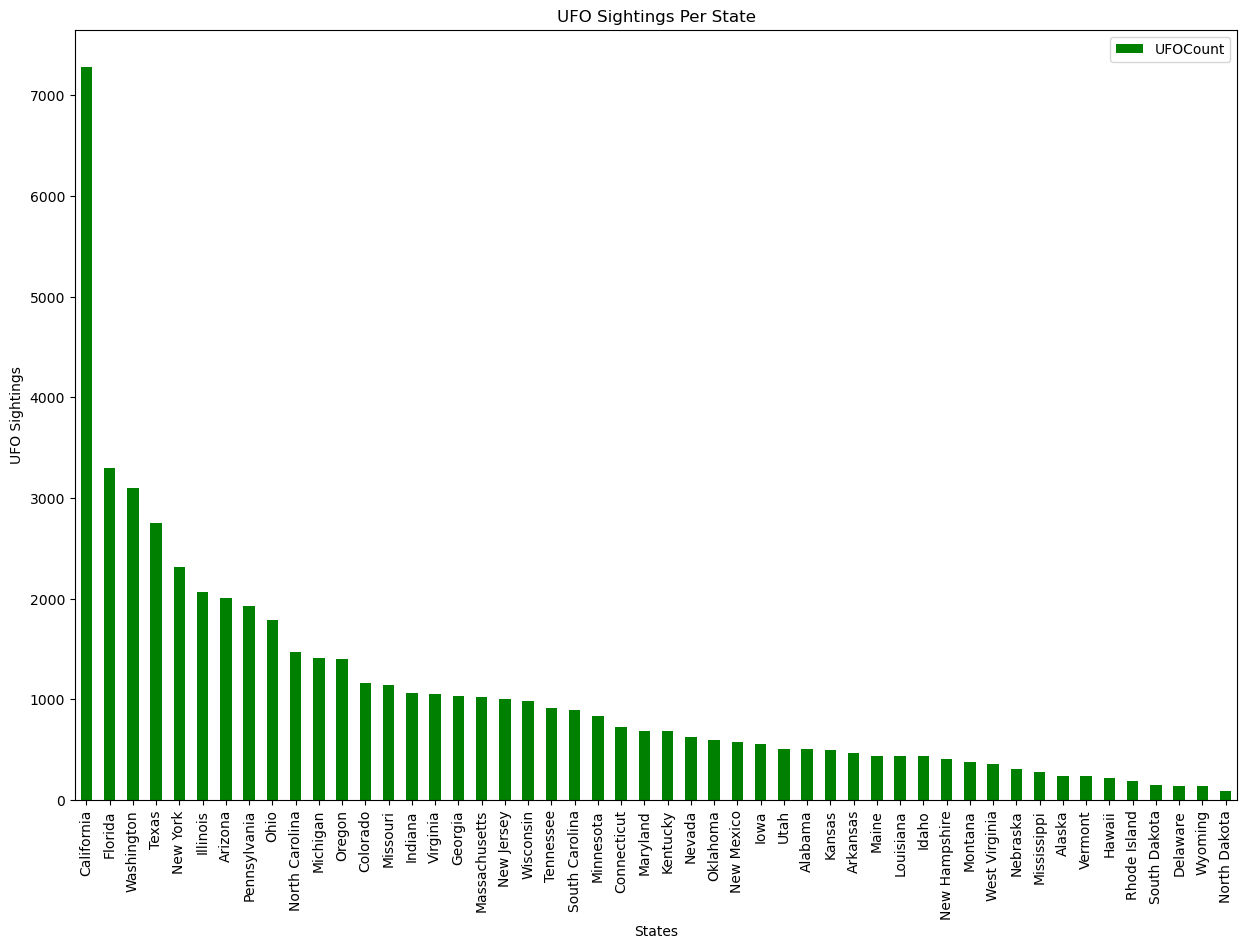

In [15]:
#PLOT 1 - BAR PLOT
data.plot.bar(x='State', y='UFOCount', rot=0, color='g', figsize=(15, 10)) 

# Set labels and title for UFO Sightings Bar Chart
plt.xlabel("States")
plt.ylabel("UFO Sightings")
plt.xticks(rotation=90)
plt.title("UFO Sightings Per State")
plt.show()

### Plot 2 - Histogram

It can be seen that there is a peak in frequency of there being less than 1000 UFO Sightings in a state. Based on the histogram, it can also be said that the median of the number of UFO Sightings ranges from 0-1000. This histogram represents the frequency of a certain number of UFO sightings and it can be said that most of the sightings in value range from 0-1200 total.

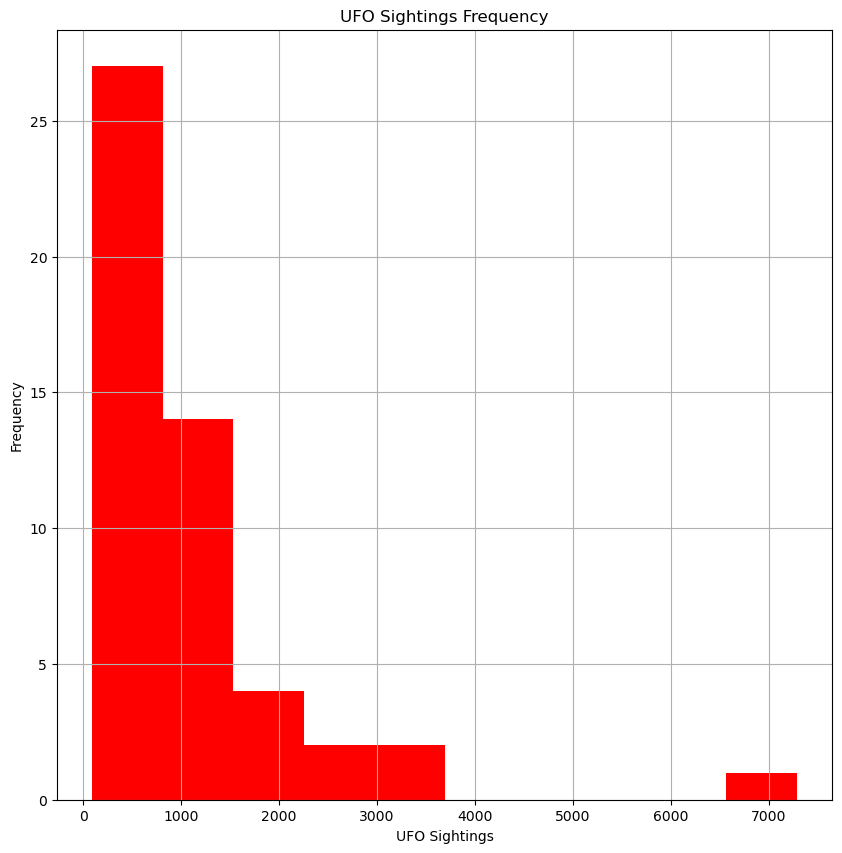

In [16]:
#PLOT 2 - HISTOGRAM
data.hist('UFOCount', bins=10, figsize=(10, 10), color='r', backend=None) 

# Set labels and title for UFO Sightings Bar Chart
plt.xlabel("UFO Sightings")
plt.ylabel("Frequency")
plt.title("UFO Sightings Frequency")
plt.show()

### Plot 3 - Box Plot

Based on the Box plot, it can be seen that the median number of UFO sightings is less than 1000 per state. Additionally, it can be said that there are high outliers of around 7000 sightings and that most of the data is concentrated in the lower end, ranging from around 0 to 2000 sightings per state. This Box Plot shows that the distribution is mostly normal with a slightly negative skew by looking at the graph itself.

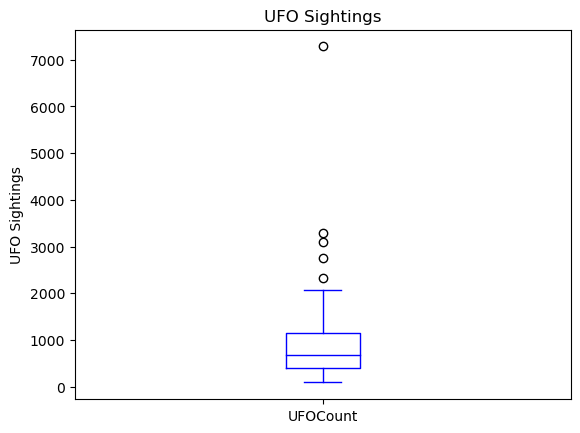

In [19]:
#PLOT 3 - Box Plot
data['UFOCount'].plot(kind='box', color='blue', title='title_of_plot')

# Set labels and title for Scatterplot
plt.ylabel("UFO Sightings")

plt.title("UFO Sightings")
plt.show()

### Scatterplot

Based on the scatterplot shown below, we can see that the number of military bases and the number of UFO Sightings
seem to have some sort of relationship as there is a concentration near the bottom of the graph and it seems to
be linear if a line of best fit was to be drawn. We can also see that there are some serious outliers in the graph
in the top right, which seems to be out of range compared to the rest of the two datasets in comparison.

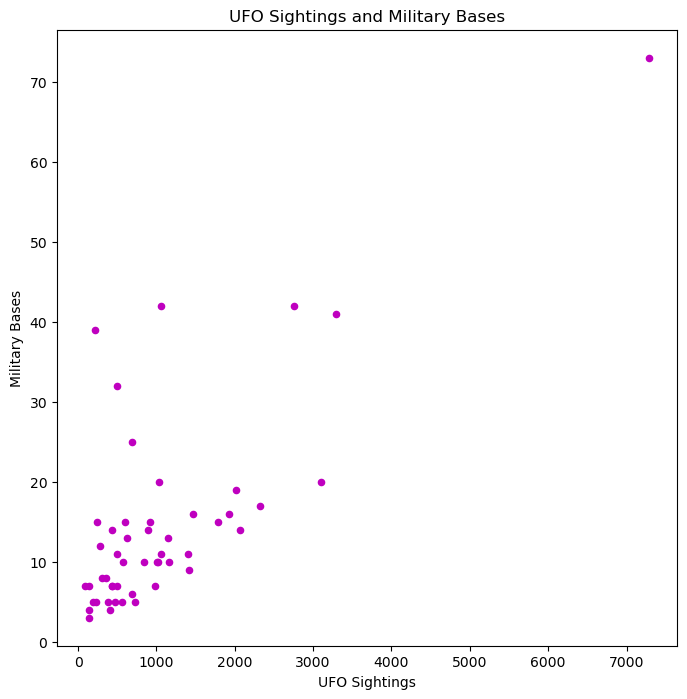

In [25]:
#SCATTERPLOT
data.plot.scatter(x='UFOCount', y='MilitaryBaseCount', figsize=(8, 8), color='m')

# Set labels and title for Scatterplot
plt.xlabel("UFO Sightings")
plt.ylabel("Military Bases")


plt.title("UFO Sightings and Military Bases")
plt.show()

## Independence

### Covariance and Correlation

Given that the covariance between the 2 sets (# of UFO Sightings and # of Military Bases) is 
highly positive and is a large number, it can be said that the relationship is postive and 
therefore a more direct relationship between the two datasets. When it comes to the correlation, it is a positive number 
that is close to 1, therefore also indicating a more direct relationship. We know that a correlation coefficient of 1
will result in a perfectly direct relationship, so a correlation coeffiecient of the number we received is somewhat
close to a direct relationship between the two datasets, # of UFO Sightings and the # of Military Bases. 
Based on these calculations, it can be said that there is a dependent relationship between the # of UFO Sightings 
and the # of Military Bases

In [12]:
#INDEPENDENCE CALCULATIONS
#calculate covariance
covariance = data['UFOCount'].cov(data['MilitaryBaseCount'])
#calculate correlation
correlation = data['UFOCount'].corr(data['MilitaryBaseCount'])
print ('The Covariance between # of UFO Sightings and # of Military Bases is ' + str(round (covariance, 3)) + ' UFOs*Mil. Bases')
print ('The Correlation between # of UFO Sightings and # of Military Bases is ' + str(round (correlation, 3)))

The Covariance between # of UFO Sightings and # of Military Bases is 11516.261 UFOs*Mil. Bases
The Correlation between # of UFO Sightings and # of Military Bases is 0.747


## Distribution

### Density Histogram vs. Theoretical Normal Distribution

The following code re-plots the Military base data, but now as a density function. It also plots a theoretical normal distribution onto the same plot for comparative analysis. These steps are completed mainly with Matplotlib.

Text(0.5, 1.0, 'Military Base Density histogram vs Predicted Normal Distribution')

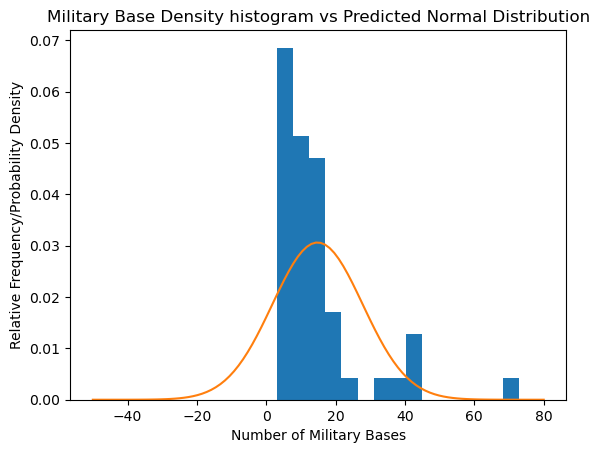

In [13]:
mil_mean = mil.mean()
mil_sd = mil.std(ddof=1)

x=np.linspace(-50,80,100)
plt.hist(mil, bins=15, density=True)
plt.plot(x,norm.pdf(x,loc=mil_mean,scale=mil_sd))

plt.xlabel('Number of Military Bases')
plt.ylabel('Relative Frequency/Probability Density')
plt.title('Military Base Density histogram vs Predicted Normal Distribution')

### Q-Q plot

The following cell plots our Military base data onto a Q-Q plot. First we sorted the data, and then created the theoretical quantiles of this data, based on a normal distribution. Next, we plotted these theoretical quantiles versus our sorted data. For comparative analysis, we also plotted the baseline for a perfect normal distribution, as represented by the red line.

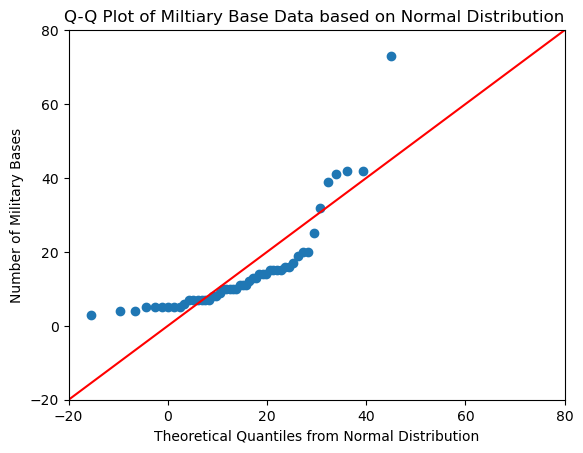

In [14]:
mil_sorted = np.sort(mil) #Sorting for quantile organization
sample_size = len(mil) #Sample size

q = np.linspace((1-0.5)*(1/sample_size), (sample_size-0.5)*(1/sample_size), sample_size) #Quantiles
theoretical_quantiles = norm.ppf(q, loc=mil_mean, scale=mil_sd) #Mapping to norm
plt.scatter(theoretical_quantiles, mil_sorted) #Graphing quantiles and sorted military data
plt.axline([0, 0], [1, 1] , c='r') #Baseline Norm

#Graph Labeling and Sizing
plt.xlabel('Theoretical Quantiles from Normal Distribution')
plt.ylabel('Number of Military Bases')
plt.title('Q-Q Plot of Miltiary Base Data based on Normal Distribution ')
plt.xlim(-20,80)
plt.ylim(-20,80)

plt.show()

### Comparison to Normal Distribution

Above we have plotted both a graph comparing the military base data to a theoretical normal distribution, as well as a Q-Q plot comparing the quantiles of our military base data to the quantiles of the theoretical normal distribution. From both, it is evident that the military base data is likely not normal, since it neither aligns in the histogram comparison nor the Q-Q plot comparison. In the histogram, the major right-skewness of the data differs from the symmetrical normal distribution. Furthermore, the lack of fit to a linear baseline in the Q-Q plot indicates that a normal distribution is not the correct fitting.